In [1]:
import os
import re
from collections import defaultdict
from operator import itemgetter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from IPython.display import display

%matplotlib inline

DIR = r'c://downloads'

plt.style.use('ggplot')

In [2]:
# From: ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam31.0/proteomes/9606.tsv.gz
human_pfam_records = pd.read_csv(os.path.join(DIR, '9606.tsv.gz'), sep = r'\t|> <', skiprows = 2, na_values = ['No_clan'], \
        engine = 'python').rename(columns = lambda name: re.sub(r'[ \-]', '_', re.sub(r'[#\<\>]', '', name)).lower())
human_pfam_records['length'] = human_pfam_records['alignment_end'] - human_pfam_records['alignment_start'] + 1
human_pfam_domains = human_pfam_records[human_pfam_records['type'] == 'Domain']
display(human_pfam_records)

,seq_id,alignment_start,alignment_end,envelope_start,envelope_end,hmm_acc,hmm_name,type,hmm_start,hmm_end,hmm_length,bit_score,e_value,clan,length
0,A0A024QZ18,69,147,66,147,PF00595,PDZ,Domain,4,82,82,51.3,1.600000e-10,CL0466,79
1,A0A024QZ33,5,123,4,123,PF09745,DUF2040,Coiled-coil,2,121,121,124.9,2.600000e-33,NaN,119
2,A0A024QZ42,25,84,22,86,PF13499,EF-hand_7,Domain,4,69,71,41.7,1.800000e-07,CL0220,60
3,A0A024QZB8,40,436,39,437,PF02487,CLN3,Family,2,398,399,461.1,4.800000e-135,NaN,397
4,A0A024QZP7,4,287,4,287,PF00069,Pkinase,Domain,1,264,264,258.8,7.400000e-74,CL0016,284
5,A0A024QZX5,11,380,10,380,PF00079,Serpin,Domain,2,370,370,435.8,2.300000e-127,NaN,370
6,A0A024R0K5,40,140,38,141,PF07686,V-set,Domain,3,108,109,47.4,2.600000e-09,CL0011,101
7,A0A024R0K5,239,318,239,318,PF13895,Ig_2,Domain,1,79,79,62.7,4.500000e-14,CL0011,80
8,A0A024R0K5,418,495,417,496,PF13895,Ig_2,Domain,2,78,79,56.9,3.000000e-12,CL0011,78
9,A0A024R0K5,596,663,595,674,PF13895,Ig_2,Domain,2,69,79,40.2,4.700000e-07,CL0011,68


Text(0,0.5,'Domain length (aa)')

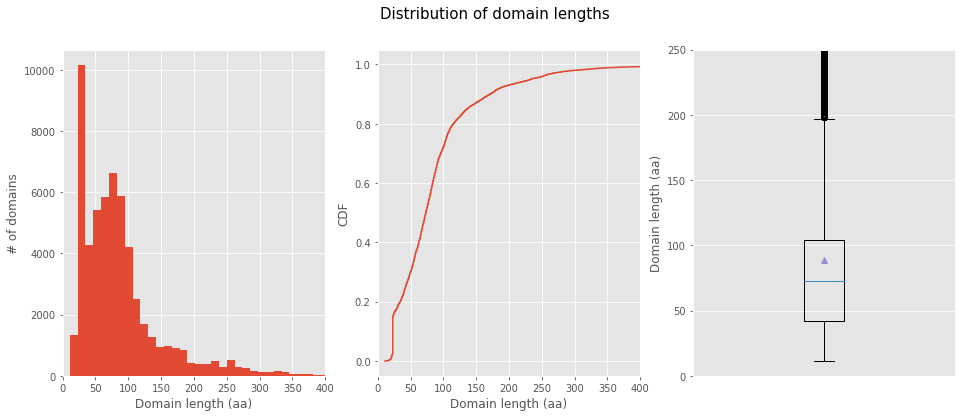

In [3]:
fig, axes = plt.subplots(figsize = (16, 6), ncols = 3)
fig.suptitle('Distribution of domain lengths', size = 15)

axes[0].hist(human_pfam_domains['length'], 100)
axes[0].set_xlim([0, 400])
axes[0].set_xlabel('Domain length (aa)')
axes[0].set_ylabel('# of domains')

axes[1].plot(np.sort(human_pfam_domains['length']), np.linspace(0, 1, len(human_pfam_domains)))
axes[1].set_xlim([0, 400])
axes[1].set_xlabel('Domain length (aa)')
axes[1].set_ylabel('CDF')

axes[2].boxplot(human_pfam_domains['length'], showmeans = True)
axes[2].set_ylim([0, 250])
axes[2].set_xticks([])
axes[2].set_ylabel('Domain length (aa)')

Q1, Q2 and Q3 in the box plot can be deduced from the CDF plot by looking which domain length values give 0.25, 0.5 and 0.75 (respectively) in the CDF.

Text(0.5,1,'HMM length distribution per type')

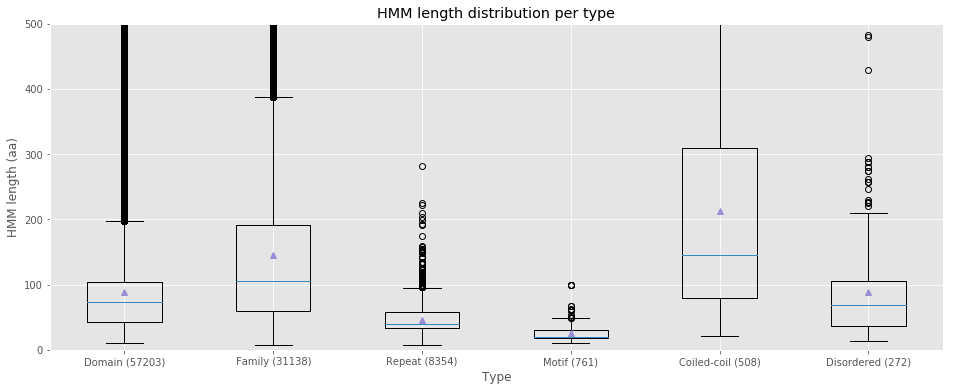

In [4]:
lengths_per_type = defaultdict(list)

for _, record in human_pfam_records.iterrows():
    lengths_per_type[record['type']].append(record['length'])

types_and_lengths = sorted(lengths_per_type.items(), key = lambda type_and_length: len(type_and_length[1]), reverse = True)
all_lengths = [lengths for _, lengths in types_and_lengths]

fig, ax = plt.subplots(figsize = (16, 6))
ax.boxplot(all_lengths, showmeans = True)
ax.set_xticklabels(['%s (%d)' % (type_name, len(lengths)) for type_name, lengths in types_and_lengths])
ax.set_ylim([0, 500])
ax.set_xlabel('Type')
ax.set_ylabel('HMM length (aa)')
ax.set_title('HMM length distribution per type')

Text(0.5,1,'Domain lengths per clan')

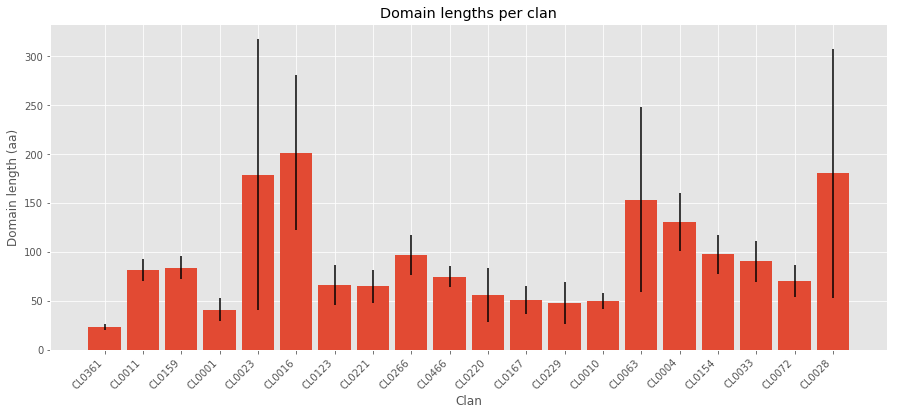

In [5]:
lengths_per_clan = defaultdict(list)

for _, record in human_pfam_domains.dropna(subset = ['clan']).iterrows():
    lengths_per_clan[record['clan']].append(record['length'])

clans_and_lengths = sorted(lengths_per_clan.items(), key = lambda clan_and_length: len(clan_and_length[1]), reverse = True)[:20]
all_clans, all_lengths = zip(*clans_and_lengths)
averages = list(map(np.average, all_lengths))
stds = list(map(np.std, all_lengths))

fig, ax = plt.subplots(figsize = (15, 6))
x_positions = np.arange(len(clans_and_lengths))
ax.bar(x_positions, averages, yerr = stds, width = 0.85)
ax.set_xticks(x_positions)
ax.set_xticklabels(all_clans, rotation = 45, horizontalalignment = 'right')
ax.set_xlabel('Clan')
ax.set_ylabel('Domain length (aa)')
ax.set_title('Domain lengths per clan')

Text(0.5,1,'Most common clans')

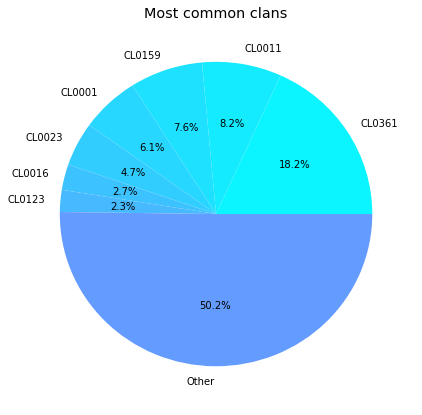

In [6]:
occurrences_per_clan = {clan: len(lengths) for clan, lengths in lengths_per_clan.items()}
common_clans, common_occurrences = zip(*sorted(occurrences_per_clan.items(), key = itemgetter(1), reverse = True)[:7])
other_occurrences = sum(occurrences_per_clan.values()) - sum(common_occurrences)

colors = [plt.cm.cool(10 * (i + 1)) for i in range(7)] + [plt.cm.cool(100)]

fig, ax = plt.subplots(figsize = (7, 7))
ax.pie(common_occurrences + (other_occurrences,), labels = common_clans + ('Other',), colors = colors, autopct = '%1.1f%%')
ax.set_title('Most common clans')

Text(0.5,1,'Domain lengths vs. E-values')

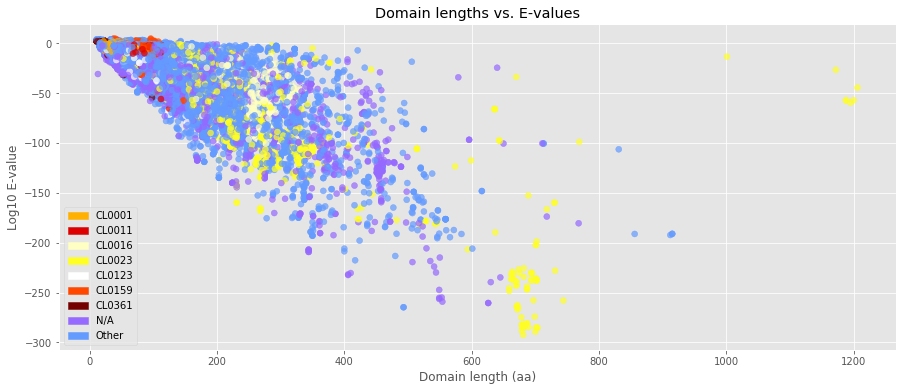

In [7]:
common_clan_colors = {clan: plt.cm.hot(40 * (i + 1)) for i, clan in enumerate(common_clans)}
other_clan_color = plt.cm.cool(100)
no_clan_color = plt.cm.cool(150)

color_labels = common_clan_colors.copy()
color_labels.update({'Other': other_clan_color, 'N/A': no_clan_color})

def get_clan_color(clan):
    if pd.isnull(clan):
        return no_clan_color
    else:
        return common_clan_colors.get(clan, other_clan_color)

filtered_human_pfam_domains = human_pfam_domains[human_pfam_domains['e_value'] > 0]
colors = filtered_human_pfam_domains['clan'].apply(get_clan_color)

fig, ax = plt.subplots(figsize = (15, 6))
ax.scatter(filtered_human_pfam_domains['length'], np.log10(filtered_human_pfam_domains['e_value']), c = colors, alpha = 0.7)
ax.legend(handles = [mpatches.Patch(color = color, label = label) for label, color in sorted(color_labels.items())])
ax.set_xlabel('Domain length (aa)')
ax.set_ylabel('Log10 E-value')
ax.set_title('Domain lengths vs. E-values')

Text(0.5,1,'E-value as a function of position for PDZ domains in the Q8NI35 protein')

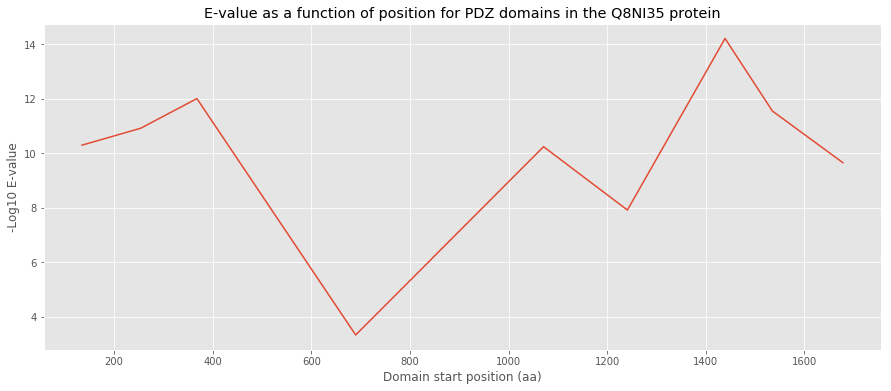

In [8]:
Q8NI35_PDZ_records = human_pfam_domains[(human_pfam_domains['hmm_name'] == 'PDZ') & \
        (human_pfam_domains['seq_id'] == 'Q8NI35')].sort_values('alignment_start')

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(Q8NI35_PDZ_records['alignment_start'], -np.log10(Q8NI35_PDZ_records['e_value']))
ax.set_xlabel('Domain start position (aa)')
ax.set_ylabel('-Log10 E-value')
ax.set_title('E-value as a function of position for PDZ domains in the Q8NI35 protein')